https://lightgbm.readthedocs.io/en/stable/

In [1]:
%reload_kedro

2023-10-09 14:26:17,254 - kedro.extras.extensions.ipython - INFO - No path argument was provided. Using: C:\Users\Dushku\PycharmProjects\monash-datahack-2023
2023-10-09 14:26:17,382 - kedro.framework.session.store - INFO - `read()` not implemented for `BaseSessionStore`. Assuming empty store.
2023-10-09 14:26:17,406 - kedro.framework.hooks.manager - INFO - Registered hooks from 1 installed plugin(s): kedro-telemetry-0.2.5
2023-10-09 14:26:17,463 - kedro.extras.extensions.ipython - INFO - ** Kedro project Monash datahack 2023
2023-10-09 14:26:17,463 - kedro.extras.extensions.ipython - INFO - Defined global variable `context`, `session`, `catalog` and `pipelines`


C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\kedro\framework\context\context.py:344: UserWarning: Credentials not found in your Kedro project config.
No files found in ['C:\\Users\\Dushku\\PycharmProjects\\monash-datahack-2023\\conf\\base', 'C:\\Users\\Dushku\\PycharmProjects\\monash-datahack-2023\\conf\\local'] matching the glob pattern(s): ['credentials*', 'credentials*/**', '**/credentials*']
  warn(f"Credentials not found in your Kedro project config.\n{str(exc)}")


In [2]:
df = catalog.load('encoded_data_with_type_classification')

2023-10-09 14:26:17,469 - kedro.io.data_catalog - INFO - Loading data from `encoded_data_with_type_classification` (CSVDataSet)...


In [3]:
df.head()

,y,Jurisdiction_encoded,Sub-stream,Category_encoded,Type_encoded,Management_encoded,Fate_encoded,ds_encoded
0,4601,0,3,1,7,3,0,14
1,0,0,3,1,7,4,3,14
2,4601,0,9,1,7,3,0,14
3,0,0,9,1,7,4,3,14
4,0,0,2,2,5,4,3,14


In [4]:
df.columns

Index(['y', 'Jurisdiction_encoded', 'Sub-stream', 'Category_encoded',
       'Type_encoded', 'Management_encoded', 'Fate_encoded', 'ds_encoded'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54227 entries, 0 to 54226
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   y                     54227 non-null  int64
 1   Jurisdiction_encoded  54227 non-null  int64
 2   Sub-stream            54227 non-null  int64
 3   Category_encoded      54227 non-null  int64
 4   Type_encoded          54227 non-null  int64
 5   Management_encoded    54227 non-null  int64
 6   Fate_encoded          54227 non-null  int64
 7   ds_encoded            54227 non-null  int64
dtypes: int64(8)
memory usage: 3.3 MB


In [6]:
from sklearn.model_selection import train_test_split

In [7]:
feature_columns = ['ds_encoded', 'Jurisdiction_encoded', 'Category_encoded', 'Type_encoded', 'Management_encoded', 'Fate_encoded', 'Sub-stream']
# Define your target variable (y) and features (X)
# Replace 'target_column' with the name of your target column and 'feature_columns' with the list of feature column names.
y = df['y']
X = df[feature_columns]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.8 = 0.2

In [8]:
from sklearn.metrics import r2_score
import lightgbm as lgb

In [9]:
train_data = lgb.Dataset(X_train, label=y_train)

In [10]:
validation_data = train_data.create_valid(X_val, y_val)

In [11]:
param = {
    'application' : 'regression', 
    'learning_rate':0.3, 
    'max_bin':200,
    'max_depth':5, 
    'min_data_in_leaf':20, 
    'num_iterations':1000,
    'num_leaves':200, 
    'objective':'root_mean_squared_error',
    'random_state':42, 
    'reg_sqrt':'True', 
    'task':'predict'
}

In [12]:
num_round = 1000
bst = lgb.train(param, train_data, 
                num_round, 
                valid_sets=[validation_data])

C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\lightgbm\engine.py:172: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 136
[LightGBM] [Info] Number of data points in the train set: 32535, number of used features: 7
[LightGBM] [Info] Start training from score 15.590219
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [13]:
y_pred = bst.predict(X_test)

In [14]:
r2_score = r2_score(y_test, y_pred)

print(r2_score)

0.8521548592009482


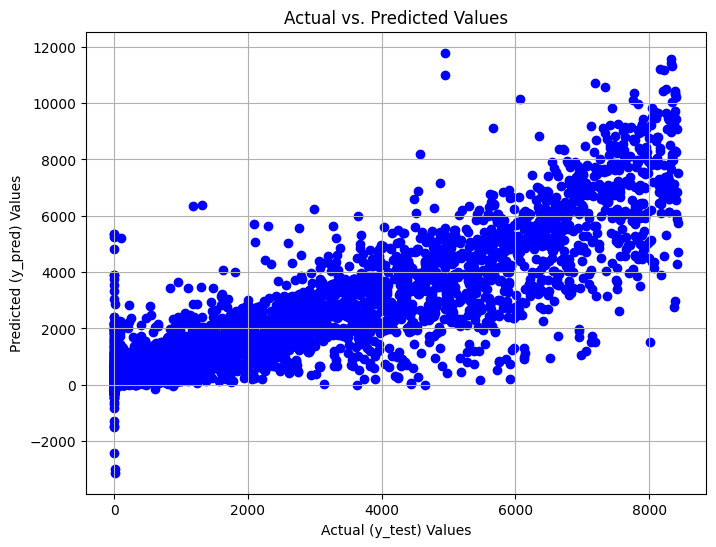

In [15]:
import matplotlib.pyplot as plt
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, c='blue', marker='o')
plt.xlabel('Actual (y_test) Values')
plt.ylabel('Predicted (y_pred) Values')
plt.title('Actual vs. Predicted Values')
plt.grid(True)
plt.show()

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold

def gridsearch():
    skf = StratifiedKFold(n_splits=3, shuffle = True, random_state = 1001)
    num_round = 500
    
    lgb_model = lgb.LGBMRegressor(
        task = 'predict',
        application = 'regression',
        objective = 'root_mean_squared_error',
        boosting_type="gbdt",
        num_iterations = 1000,
        #tree_learner='feature',
        #reg_sqrt = 'True',
        #metric ='rmse',
        #feature_fraction = 0.6,
        random_state=42)
    
    params = {
        'max_depth': [3, 4, 5],
        'min_data_in_leaf': [10, 20, 30],
        # Use small learning_rate with large num_iterations
        'learning_rate' : [0.1, 0.2, 0.3],
        # Use large num_leaves (may cause over-fitting)
        'num_leaves': [200,300,400,500,600,700],
        # Use large max_bin (may be slower)
        'max_bin' : [200,300,400],
        }
    
    grid = GridSearchCV(estimator=lgb_model, param_grid=params, scoring='r2', n_jobs=4, cv=skf.split(X_train,y_train), verbose=3)
    grid.fit(X_train, y_train)
    print("Best estimator: ")
    print(grid.best_estimator_)
    print("Best parameters: ")
    print(grid.best_params_)
    
gridsearch()

C:\Users\Dushku\PycharmProjects\monash-datahack-2023\venv\lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Fitting 3 folds for each of 486 candidates, totalling 1458 fits


KeyboardInterrupt: 

### Best estimator
LGBMRegressor(application='regression', learning_rate=0.3, max_bin=200,
              max_depth=5, min_data_in_leaf=20, num_iterations=1000,
              num_leaves=200, objective='root_mean_squared_error',
              random_state=42, reg_sqrt='True', task='predict')

### Best parameters
{'learning_rate': 0.3, 'max_bin': 200, 'max_depth': 5, 'min_data_in_leaf': 20, 'num_leaves': 200}

